In [102]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
    print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


In [103]:
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers,models,utils

import matplotlib.pyplot as plt

In [104]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [105]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10000)

In [106]:
print('x_train shape : %s' % str(x_train.shape))
print('y_train shape : %s' % str(y_train.shape))
print('x_test shape : %s' % str(x_test.shape))
print('y_test shape : %s' % str(y_test.shape))

x_train shape : (8982,)
y_train shape : (8982,)
x_test shape : (2246,)
y_test shape : (2246,)


In [107]:
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

In [108]:
print('x_train shape : %s' % str(x_train.shape))
print('x_test shape : %s' % str(x_test.shape))

x_train shape : (8982, 10000)
x_test shape : (2246, 10000)


In [109]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [110]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [111]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [112]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [113]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [114]:
history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 85us/sample - loss: 2.4626 - acc: 0.5331 - val_loss: 1.6334 - val_acc: 0.6410
Epoch 2/20
7982/7982 [==============================] - 0s 48us/sample - loss: 1.3437 - acc: 0.7100 - val_loss: 1.2642 - val_acc: 0.7330

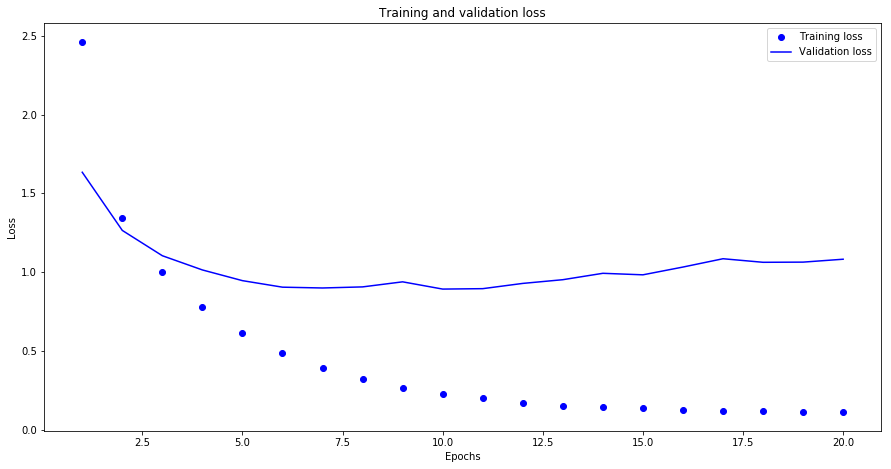

In [115]:
plt.figure(figsize=(15,7.5))
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

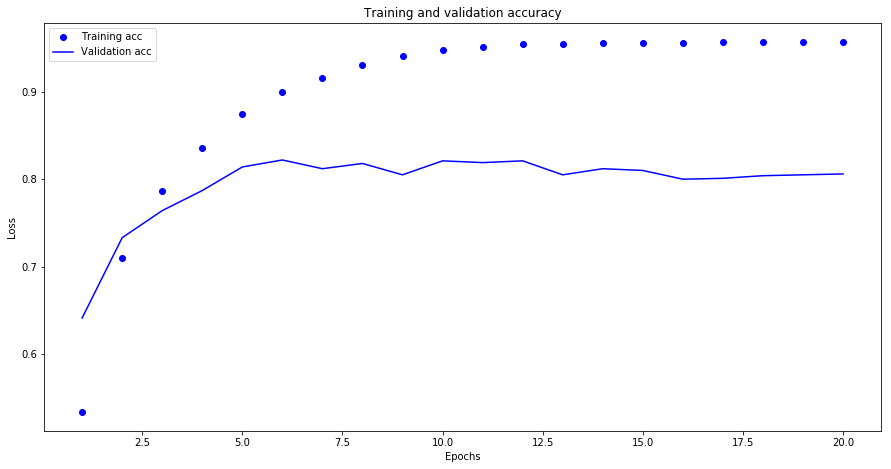

In [116]:
plt.figure(figsize=(15,7.5))
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [117]:
(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=10000)
x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [118]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [119]:
model.fit(x_train, y_train, epochs=9, batch_size=512)

Epoch 1/9
8982/8982 [==============================] - 1s 68us/sample - loss: 2.4614 - acc: 0.5611
Epoch 2/9
8982/8982 [==============================] - 1s 56us/sample - loss: 1.3029 - acc: 0.7173

In [120]:
model.evaluate(x_test, y_test)

2246/2246 [==============================] - 0s 126us/sample - loss: 0.9585 - acc: 0.7952


[0.9584734637293557, 0.79519147]

### Creating bottleneck i.e reducing number of neurons in the intermediate layer

In [121]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

In [122]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [123]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 91us/sample - loss: 2.9408 - acc: 0.2224 - val_loss: 2.3374 - val_acc: 0.2410
Epoch 2/20
7982/7982 [==============================] - 1s 69us/sample - loss: 1.9511 - acc: 0.5558 - val_loss: 1.7112 - val_acc: 

### Using more hidden units

In [124]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [125]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 125us/sample - loss: 2.2944 - acc: 0.5629 - val_loss: 1.4402 - val_acc: 0.6940
Epoch 2/10
7982/7982 [==============================] - 1s 87us/sample - loss: 1.1563 - acc: 0.7514 - val_loss: 1.1383 - val_acc: 0.7560

### Using Single layer network

In [126]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [127]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 110us/sample - loss: 2.1936 - acc: 0.5966 - val_loss: 1.4376 - val_acc: 0.7070
Epoch 2/10
7982/7982 [==============================] - 1s 86us/sample - loss: 1.1255 - acc: 0.7742 - val_loss: 1.1020 - val_acc: 0.7710

In [128]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [129]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/10
7982/7982 [==============================] - 1s 99us/sample - loss: 2.7160 - acc: 0.5650 - val_loss: 1.9206 - val_acc: 0.6790
Epoch 2/10
7982/7982 [==============================] - 1s 82us/sample - loss: 1.5542 - acc: 0.7290 - val_loss: 1.3884 - val_acc: 0.7340